In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
def NEMO_tanh(ks, a, kth, acr):
    """A generic tanh used in NEMO"""
    return a* np.tanh((ks-kth)/acr)
def NEMO_tanh_integral(ks, a, kth, acr):
    """A generic integrated tanh used in NEMO grid"""
    return a*acr*np.log(np.cosh((ks-kth)/acr))

4329.69182132


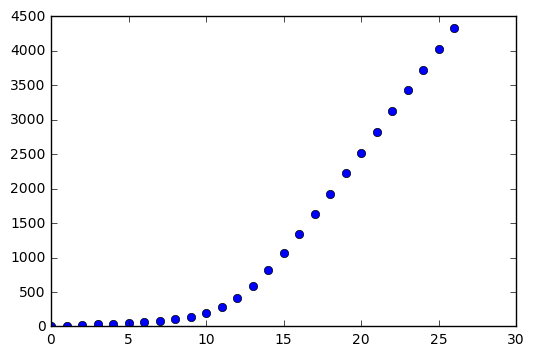

In [56]:
ks = np.arange(27)
ppa0 = 155.3
ppa1 = 146.
ppkth = 12.
ppacr = 3 #9.
depths = ppa0*ks + NEMO_tanh_integral(ks, ppa1, ppkth, ppacr)
ppsur = depths[0]
depths = depths - ppsur
print (depths[-1])
plt.plot(ks, depths, 'o')

In [57]:
ppsur

1448.5484429060723

#### We will use these as our input NEMO parameters for now and get the NEMO levels from the mesh mask generated after one time step  

#### Use the negative of the value of ppsur obtained as the output of the last cell in the NEMO namelist

4329.69182132


(0, 500)

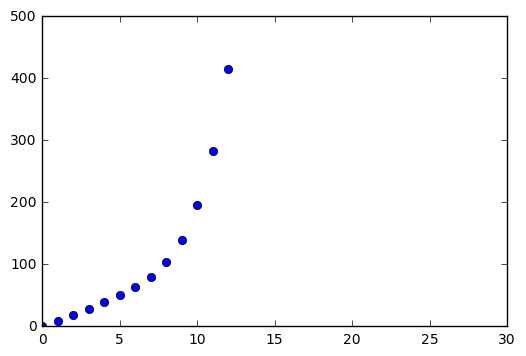

In [55]:
ks = np.arange(27)
ppa0 = 155.3
ppa1 = 146.
ppkth = 12.
ppacr = 3.
depths = ppa0*ks + NEMO_tanh_integral(ks, ppa1, ppkth, ppacr)
ppsur = depths[0]
depths = depths - ppsur
print (depths[-1])
plt.plot(ks, depths, 'o')
plt.ylim((0,500))

#### Decided NEMO depths are these below and they can be found in the mesh_mask.nc in /ocean/ssahu/CANYONS/Runs/trial_run_mesh_mask_gen/

In [58]:
nav_lev = [14.75076, 24.42878, 34.46413, 45.19286, 57.26234, 71.90678, 
    91.43279, 119.99, 164.529, 235.2601, 344.0054, 499.3054, 701.1602, 
    941.0291, 1207.09, 1489.133, 1780.207, 2076.162, 2374.693, 2674.564, 
    2975.129, 3276.051, 3577.156, 3878.357, 4179.605, 4480.879, 4782.166];

In [59]:
print(nav_lev)

[14.75076, 24.42878, 34.46413, 45.19286, 57.26234, 71.90678, 91.43279, 119.99, 164.529, 235.2601, 344.0054, 499.3054, 701.1602, 941.0291, 1207.09, 1489.133, 1780.207, 2076.162, 2374.693, 2674.564, 2975.129, 3276.051, 3577.156, 3878.357, 4179.605, 4480.879, 4782.166]
